In [97]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('datasets/loan_prediction/train.csv')
test_data = pd.read_csv('datasets/loan_prediction/test.csv')
print(train_data.shape)
print(test_data.shape)

(614, 13)
(367, 12)


In [2]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [98]:
train_data = train_data.drop(columns = "Loan_ID")
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train_data.Gender.value_counts(normalize = True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

Text(0.5, 1.0, 'Number of female and male counts in the dataset')

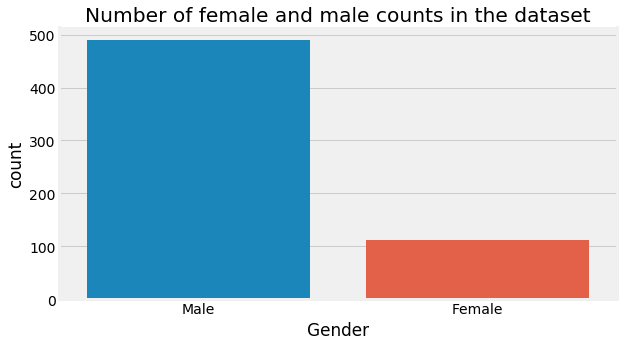

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.countplot(train_data.Gender)
plt.title("Number of female and male counts in the dataset")

Text(0.5, 1, 'Number of missing values in the dataset')

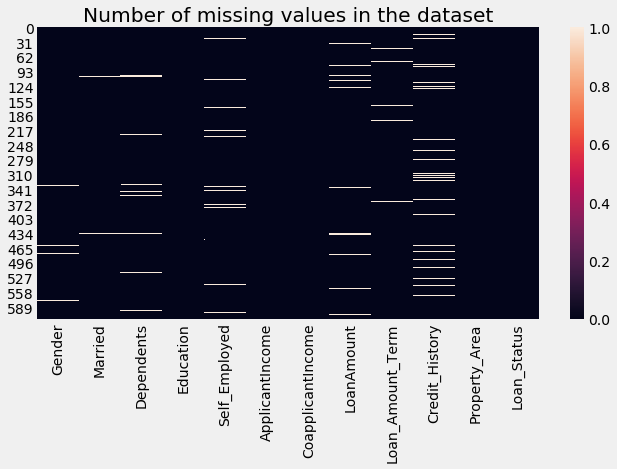

In [23]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_data.isna())
plt.title("Number of missing values in the dataset")

Loan status of male vs female


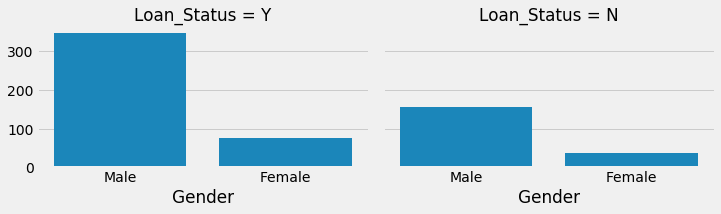

In [81]:
grid = sns.FacetGrid(train_data, col="Loan_Status", size = 3.2, aspect = 1.6)
print('Loan status of male vs female')
grid.map(sns.countplot, 'Gender')

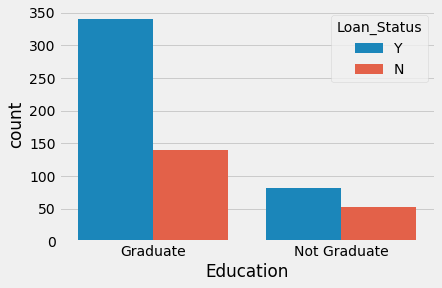

In [85]:
sns.countplot(x="Education", hue="Loan_Status", data = train_data)

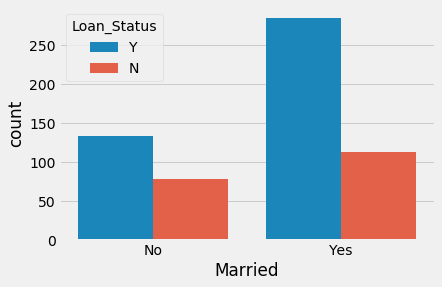

In [83]:
sns.countplot(x="Married", hue="Loan_Status", data = train_data)

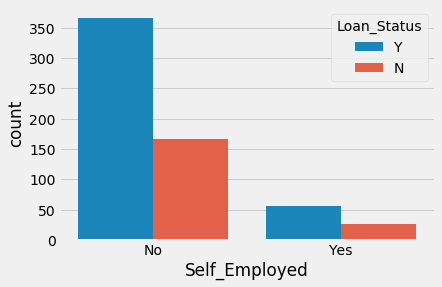

In [86]:
sns.countplot(x="Self_Employed", hue="Loan_Status", data = train_data)

In [104]:
train_data.fillna(method='bfill', inplace=True)
train_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [103]:
test_data.fillna(method='bfill', inplace=True)
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [102]:
train_data.Credit_History = train_data.Credit_History.fillna(1.0)
train_data.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [101]:
train_data.Self_Employed = train_data.Self_Employed.fillna('No')
train_data.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [100]:
train_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
train_data.LoanAmount = train_data.LoanAmount.dropna(axis = 0)
train_data.isna().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [99]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [116]:
train_data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1


In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data.Gender = le.fit_transform(train_data.Gender)
test_data.Gender = le.fit_transform(test_data.Gender)

In [108]:
train_data.Married = le.fit_transform(train_data.Married)
test_data.Married = le.fit_transform(test_data.Married)

In [110]:
train_data.Education = le.fit_transform(train_data.Education)
test_data.Education = le.fit_transform(test_data.Education)

In [112]:
train_data.Self_Employed = le.fit_transform(train_data.Self_Employed)
test_data.Self_Employed = le.fit_transform(test_data.Self_Employed)

In [114]:
train_data.Property_Area = le.fit_transform(train_data.Property_Area)
test_data.Property_Area = le.fit_transform(test_data.Property_Area)

In [117]:
train_data.Loan_Status = le.fit_transform(train_data.Loan_Status)
test_data.Loan_Status = le.fit_transform(test_data.Loan_Status)

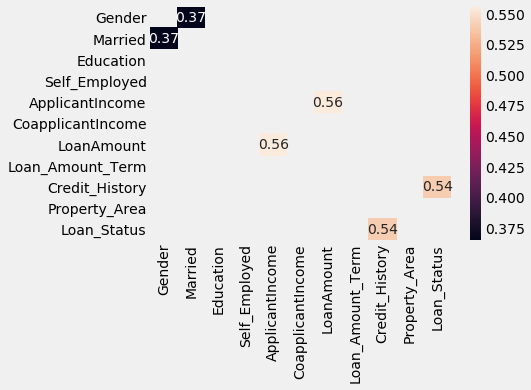

In [119]:
corr = train_data.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot = True)

In [151]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data.drop(columns = 'Loan_Status'), train_data[['Loan_Status']], 
                                                   random_state = 42, test_size = 0.3)
print(x_train.shape)
print(x_test.shape)

(429, 11)
(185, 11)


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [132]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu = False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [140]:
# train_data.Dependents = train_data.Dependents.replace(to_replace='3+', value='3')
train_data.Dependents.value_counts()

0    354
2    105
1    104
3     51
Name: Dependents, dtype: int64

In [143]:
def train_eval_train(models, X, y, x_test, y_test):
    for name, model in models.items():
        print("for",name,':')
        model.fit(X, y)
        loss(y_test, model.predict(x_test))
        print('-'*30)
        
train_eval_train(models, x_train, y_train, x_test, y_test)

for LogisticRegression :
pre: 0.756
  rec: 0.983
  f1: 0.855
  loss: 7.468
  acc: 0.784
------------------------------
for KNeighborsClassifier :
pre: 0.627
  rec: 0.800
  f1: 0.703
  loss: 15.123
  acc: 0.562
------------------------------
for SVC :
pre: 0.649
  rec: 1.000
  f1: 0.787
  loss: 12.136
  acc: 0.649
------------------------------
for DecisionTreeClassifier :
pre: 0.756
  rec: 0.983
  f1: 0.855
  loss: 7.468
  acc: 0.784
------------------------------


C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [148]:
x_test['new_col'] = x_test['CoapplicantIncome'] / x_test['ApplicantIncome']  
x_test['new_col_2'] = x_test['LoanAmount'] * x_test['Loan_Amount_Term'] 

In [144]:
x_train['new_col'] = x_train['CoapplicantIncome'] / x_train['ApplicantIncome']  
x_train['new_col_2'] = x_train['LoanAmount'] * x_train['Loan_Amount_Term'] 

In [149]:
x_test.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [150]:
train_eval_train(models, x_train, y_train, x_test, y_test)

for LogisticRegression :
pre: 0.649
  rec: 1.000
  f1: 0.787
  loss: 12.136
  acc: 0.649
------------------------------
for KNeighborsClassifier :
pre: 0.646
  rec: 0.867
  f1: 0.740
  loss: 13.629
  acc: 0.605
------------------------------
for SVC :
pre: 0.649
  rec: 1.000
  f1: 0.787
  loss: 12.136
  acc: 0.649
------------------------------
for DecisionTreeClassifier :
pre: 0.756
  rec: 0.983
  f1: 0.855
  loss: 7.468
  acc: 0.784
------------------------------


C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
